<a href="https://colab.research.google.com/github/vipyan/Scratch-game-falling-donut/blob/main/Airbnb_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Getting the Data**

In [34]:
import pandas as pd

# Load the dataset
data_path = r"/content/Airbnb_Data.csv"  # Adjust path if necessary
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
print(df.head(2))


        id  log_price property_type        room_type  \
0  6901257   5.010635     Apartment  Entire home/apt   
1  6304928   5.129899     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude  longitude  \
0  Real Bed              strict          True  ...  40.696524 -73.991617   
1  Real Bed              strict          True  ...  40.766115 -73.989040   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   

                             

In [35]:
# Basic information about the dataset
print(df.info())

# Summary statistics for numerical features
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

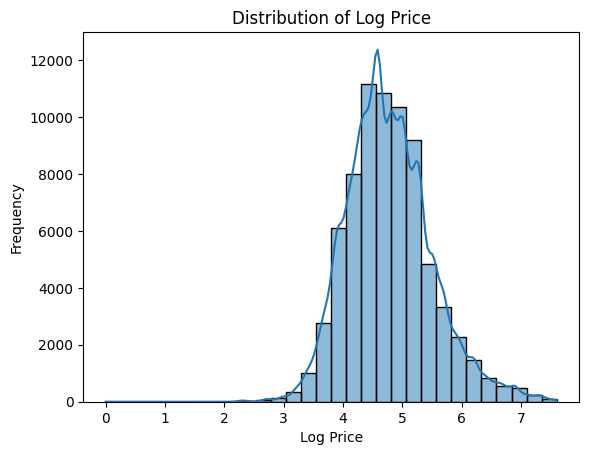

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
sns.histplot(df['log_price'], bins=30, kde=True)
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Distribution of Log Price')
plt.show()

In [37]:
# Drop unnecessary columns if needed
#df = df.drop(['id'], axis=1)  # Example: Dropping an 'id' column

# Initial handling of missing values if obvious steps are clear
# For instance, filling missing values with the median or mode
#df['column_name'].fillna(df['column_name'].median(), inplace=True)


In [38]:
# Saving to Colab's local storage
cleaned_data_path = 'Airbnb_Data_Cleaned.csv'  # Saving in the current working directory
df.to_csv(cleaned_data_path, index=False)


In [39]:
cleaned_data_path = r'/content/Airbnb_Data_Cleaned.csv'  # Define your path to cleaned data
df.to_csv(cleaned_data_path, index=False)


**Step 2: Exploratory Data Analysis (EDA)**

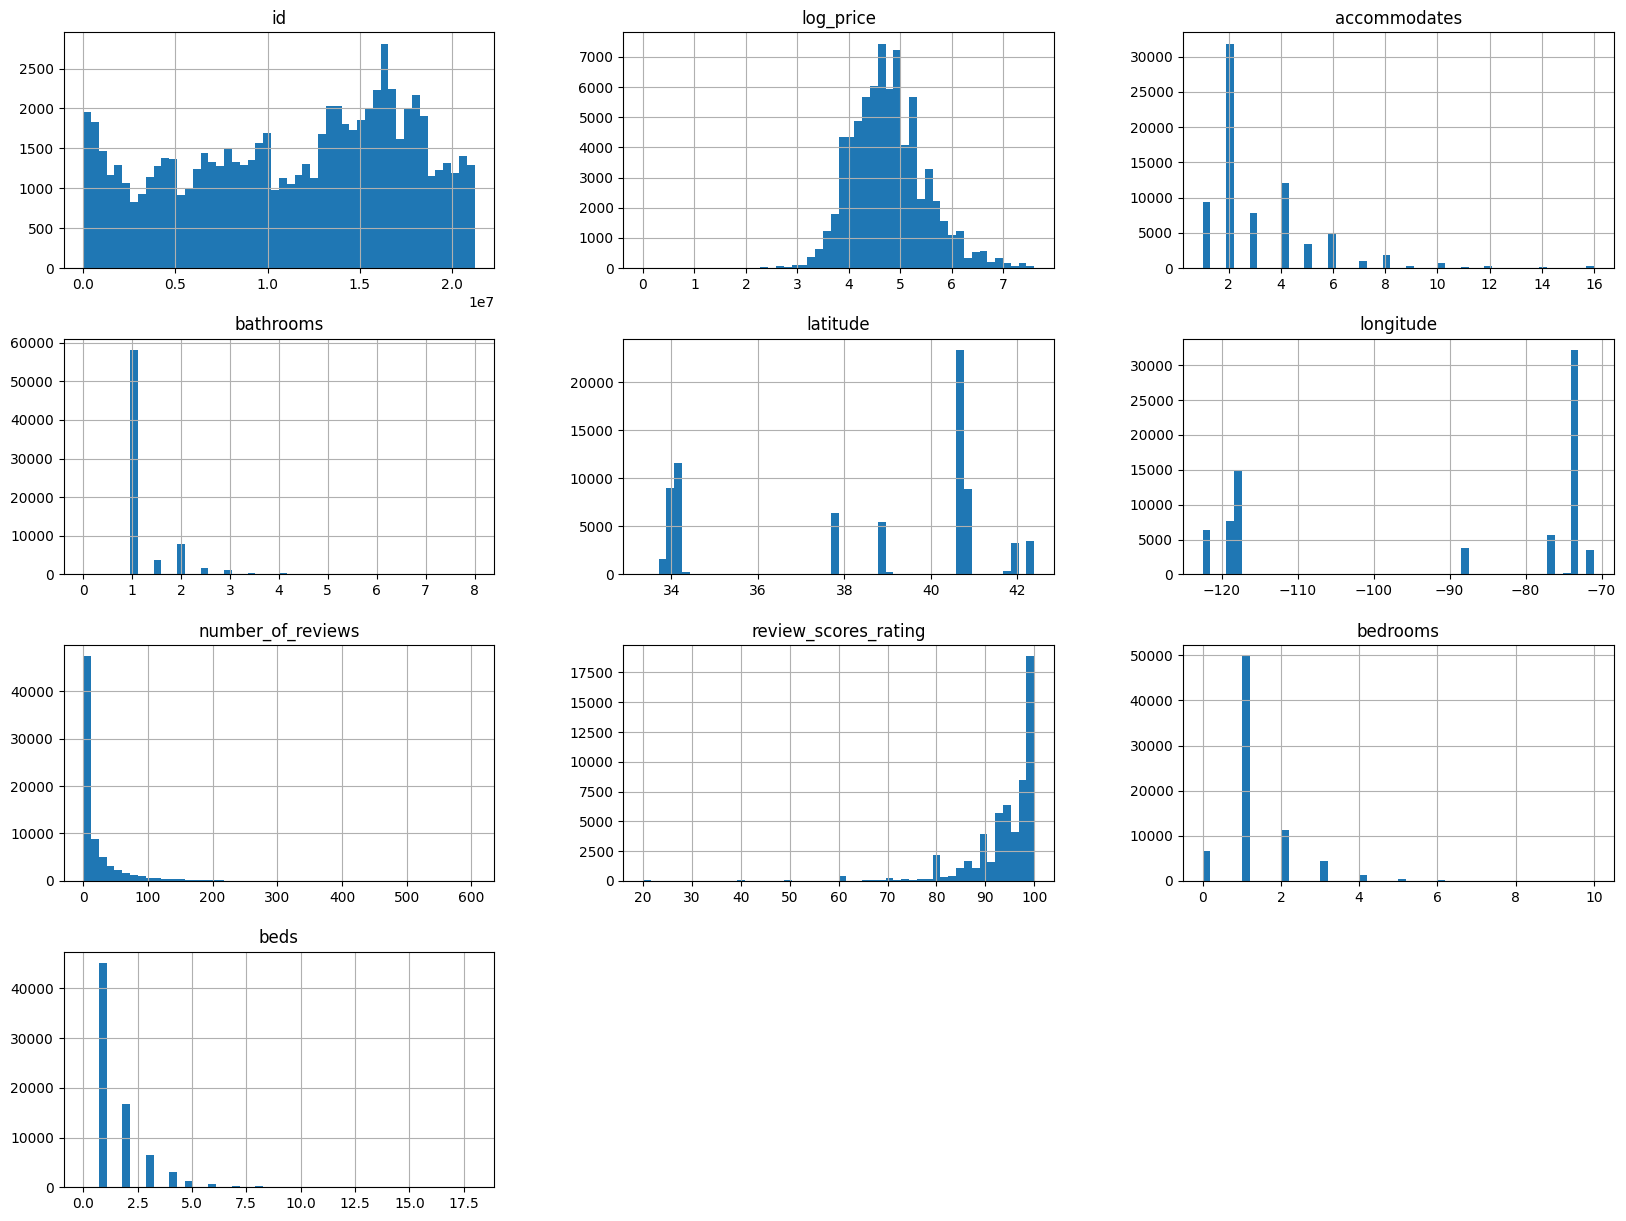

In [40]:
df.hist(bins=50, figsize=(20,15))
plt.show()


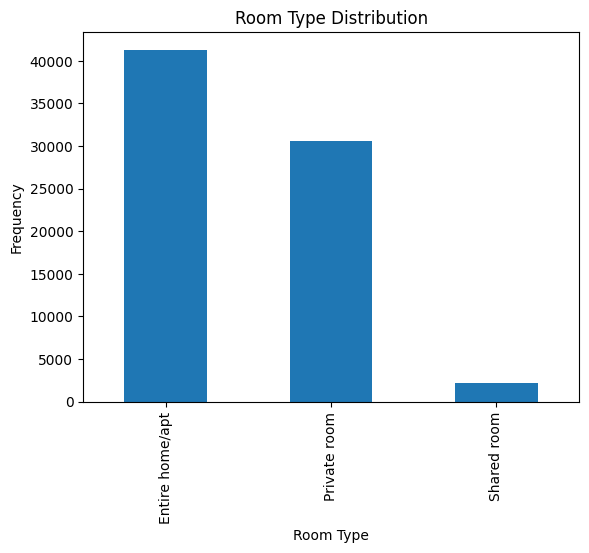

In [41]:
df['room_type'].value_counts().plot(kind='bar')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.show()


<ipython-input-42-b874e109f562>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


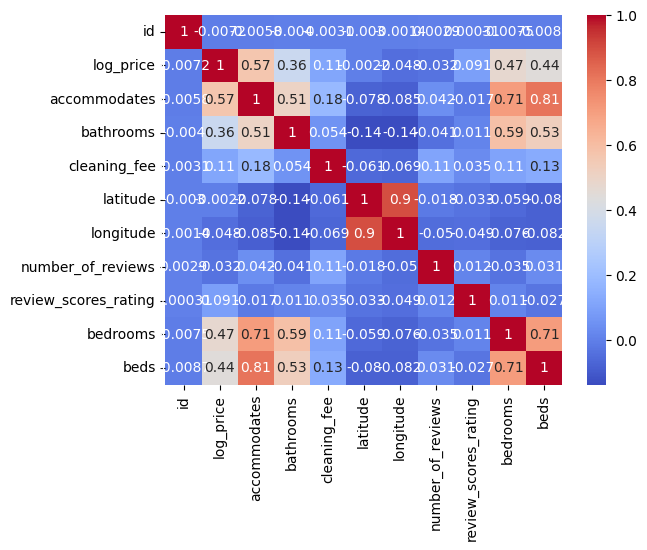

In [42]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


array([[<Axes: xlabel='log_price', ylabel='log_price'>,
        <Axes: xlabel='accommodates', ylabel='log_price'>,
        <Axes: xlabel='bathrooms', ylabel='log_price'>],
       [<Axes: xlabel='log_price', ylabel='accommodates'>,
        <Axes: xlabel='accommodates', ylabel='accommodates'>,
        <Axes: xlabel='bathrooms', ylabel='accommodates'>],
       [<Axes: xlabel='log_price', ylabel='bathrooms'>,
        <Axes: xlabel='accommodates', ylabel='bathrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bathrooms'>]], dtype=object)

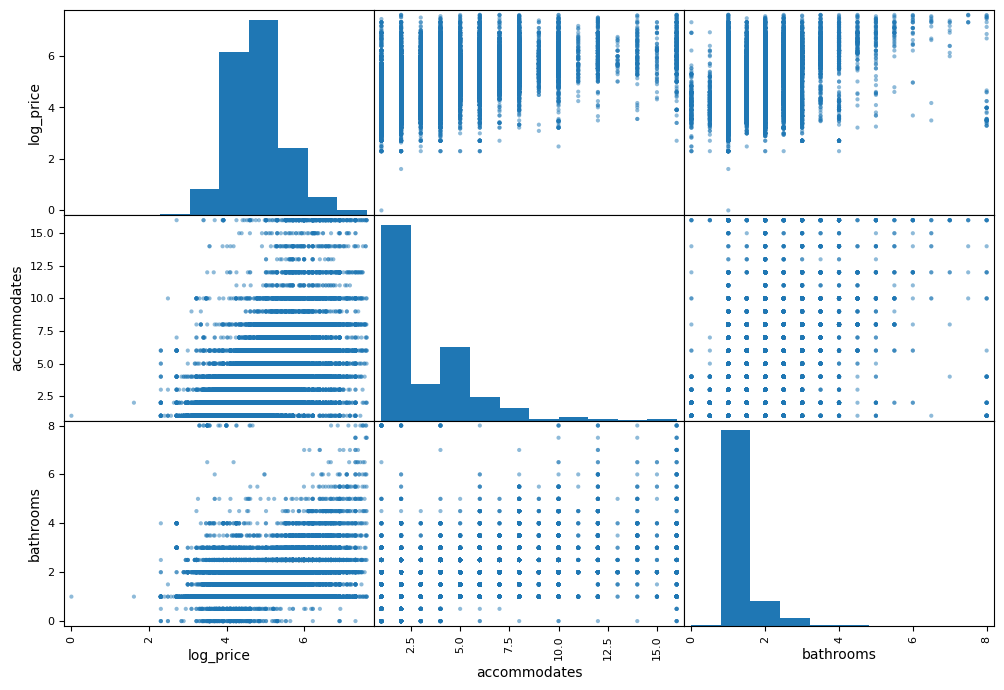

In [43]:
pd.plotting.scatter_matrix(df[['log_price', 'accommodates', 'bathrooms']], figsize=(12, 8))


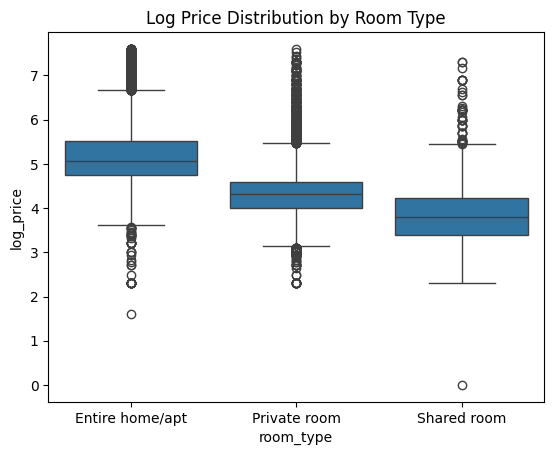

In [44]:
sns.boxplot(x='room_type', y='log_price', data=df)
plt.title('Log Price Distribution by Room Type')
plt.show()


In [45]:
print(df.isnull().sum())


id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64


***Step 2.1 Feature Engineering***

In [46]:
# Assuming amenities are separated by commas in the amenities column
df['amenity_count'] = df['amenities'].apply(lambda x: len(x.split(',')))


In [47]:
room_type_dummies = pd.get_dummies(df['room_type'], prefix='room_type')
df = pd.concat([df, room_type_dummies], axis=1)


In [48]:
# This is a simplified example. Consider more sophisticated geospatial analysis for production models.
df['lat_bin'] = pd.cut(df['latitude'], bins=10, labels=False)
df['long_bin'] = pd.cut(df['longitude'], bins=10, labels=False)


In [49]:
df['review_scores_rating_cat'] = pd.cut(df['review_scores_rating'],
                                        bins=[0, 80, 95, 100],
                                        labels=['low', 'medium', 'high'])


In [50]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['days_since_last_review'] = (pd.to_datetime('today') - df['last_review']).dt.days


In [51]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['property_age'] = (pd.to_datetime('today') - df['host_since']).dt.days


In [52]:
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)


**Step 3 Handling outliers**

In [53]:
Q1 = df['accommodates'].quantile(0.25)
Q3 = df['accommodates'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for what you consider to be outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['accommodates'] < lower_bound) | (df['accommodates'] > upper_bound)]
print("Number of outliers detected:", len(outliers))

# Optionally, view the outliers
print(outliers.head())


Number of outliers detected: 3604
           id  log_price property_type        room_type  \
19   18224863   4.595120         House  Entire home/apt   
42   12428036   4.317488     Apartment     Private room   
62   11712092   6.907755         House  Entire home/apt   
104  14900814   6.171701         House  Entire home/apt   
109    235281   5.293305     Apartment  Entire home/apt   

                                             amenities  accommodates  \
19   {TV,"Wireless Internet","Air conditioning",Kit...             8   
42   {Internet,"Wireless Internet",Kitchen,"Free pa...             8   
62   {TV,Internet,"Wireless Internet",Kitchen,"Free...             9   
104  {TV,"Cable TV",Internet,"Wireless Internet","A...             9   
109  {TV,"Cable TV",Internet,"Wireless Internet","A...             9   

     bathrooms  bed_type cancellation_policy  cleaning_fee  ... beds  \
19         1.0  Real Bed              strict          True  ...  3.0   
42         1.0  Real Bed          

In [54]:
# Capping
df['accommodates_capped'] = df['accommodates'].clip(lower=lower_bound, upper=upper_bound)


In [55]:
import numpy as np

# Apply log transformation and add 1 to avoid log(0)
df['accommodates_log'] = np.log(df['accommodates'] + 1)


In [56]:
# Removing outliers
df_no_outliers = df[(df['accommodates'] >= lower_bound) & (df['accommodates'] <= upper_bound)]


*Visualize data after handling ouliers*

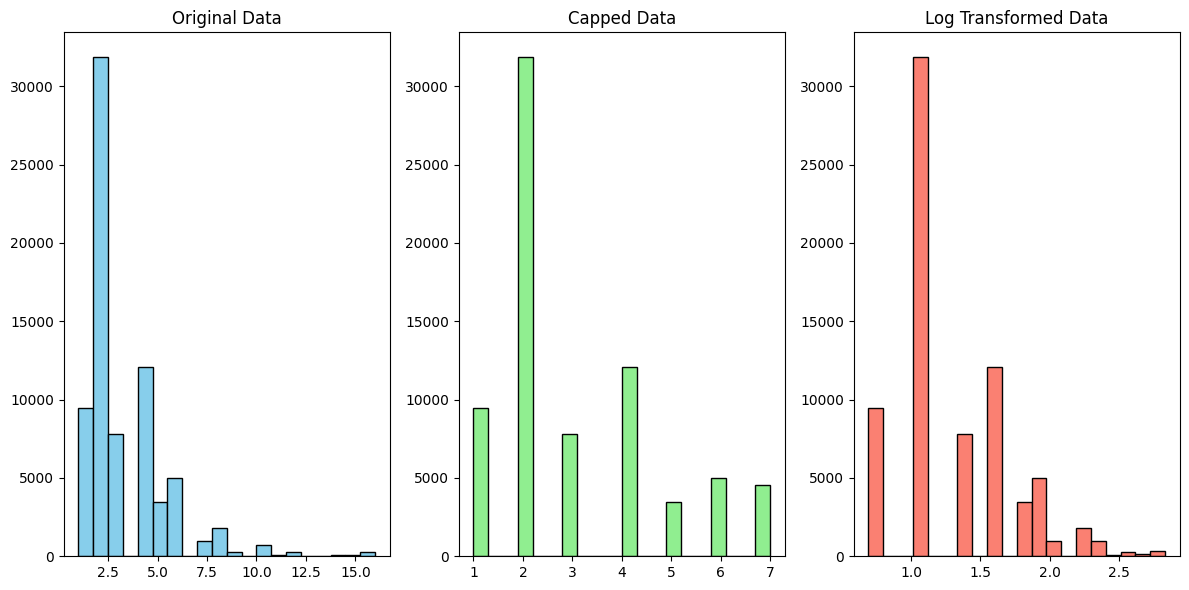

In [57]:
import matplotlib.pyplot as plt

# Original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(df['accommodates'], bins=20, color='skyblue', edgecolor='black')
plt.title('Original Data')

# Capped data
plt.subplot(1, 3, 2)
plt.hist(df['accommodates_capped'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Capped Data')

# Log-transformed data
plt.subplot(1, 3, 3)
plt.hist(df['accommodates_log'], bins=20, color='salmon', edgecolor='black')
plt.title('Log Transformed Data')

plt.tight_layout()
plt.show()


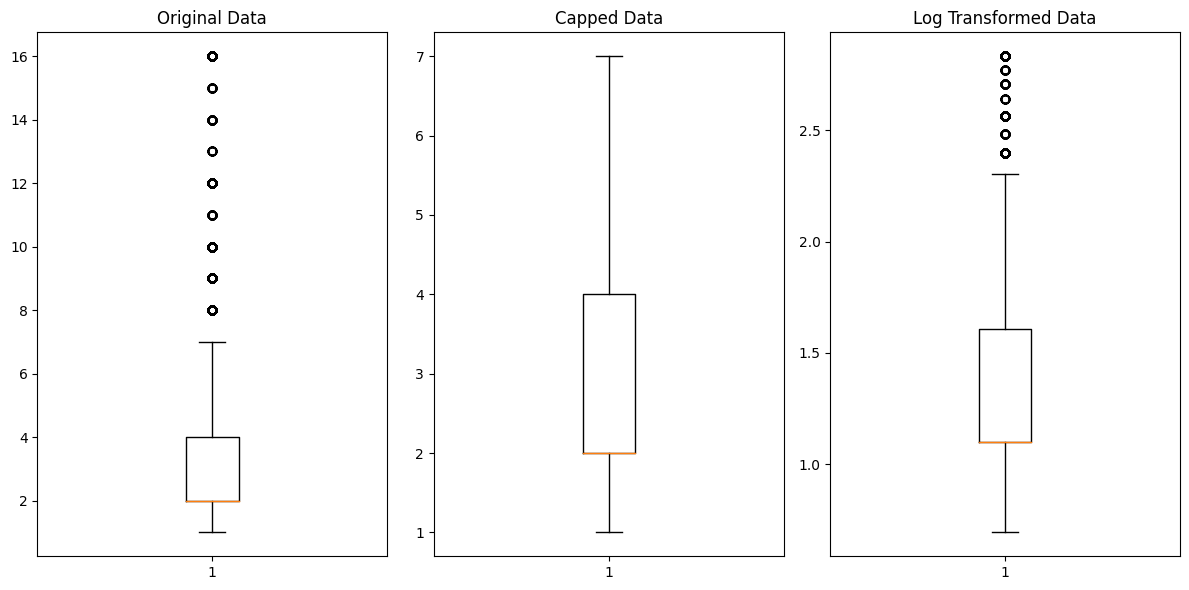

In [58]:
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 3, 1)
plt.boxplot(df['accommodates'])
plt.title('Original Data')

# Capped data
plt.subplot(1, 3, 2)
plt.boxplot(df['accommodates_capped'])
plt.title('Capped Data')

# Log-transformed data
plt.subplot(1, 3, 3)
plt.boxplot(df['accommodates_log'])
plt.title('Log Transformed Data')

plt.tight_layout()
plt.show()


**Step 4: Preparing the Data for Machine Learning Algorithms**

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenity_count']  # Example feature list
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


**Step 5: Splitting the Dataset into Training and Testing Sets**

In [60]:
from sklearn.model_selection import train_test_split

X = df.drop(['log_price'], axis=1)  # Drop the target variable
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 6: Selecting and Training Machine Learning Models**

In [61]:
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype('float32')
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype('int32')


In [62]:
df_encoded = pd.get_dummies(df, drop_first=True, sparse=True)


**Step 7: Model Training and Evaluation**

In [64]:
# Ensure all categorical columns are of type 'category' in the original DataFrame
categorical_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
                       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'review_scores_rating_cat']

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Then, split your dataset
from sklearn.model_selection import train_test_split

X = df.drop('log_price', axis=1)
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# Convert categorical columns within X_train and X_test to their codes
X_train[categorical_columns] = X_train[categorical_columns].apply(lambda x: x.cat.codes if x.name in categorical_columns else x)
X_test[categorical_columns] = X_test[categorical_columns].apply(lambda x: x.cat.codes if x.name in categorical_columns else x)


7.1. Evaluate the Model

In [68]:
from xgboost import XGBRegressor

# Initialize the model
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on your training data
xgb_reg.fit(X_train, y_train)

# Now, you can safely make predictions
y_pred = xgb_reg.predict(X_test)

# And continue with calculating the metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:amenities: object, description: object, first_review: object, host_response_rate: object, host_since: datetime64[ns], last_review: datetime64[ns], name: object, neighbourhood: object, thumbnail_url: object, zipcode: object

In [69]:
X_train = X_train.drop(['amenities', 'description', 'name', 'neighbourhood', 'thumbnail_url'], axis=1)
X_test = X_test.drop(['amenities', 'description', 'name', 'neighbourhood', 'thumbnail_url'], axis=1)


In [70]:
for df_ in [X_train, X_test]:
    df_['days_since_host_since'] = (pd.to_datetime('today') - df_['host_since']).dt.days
    df_['days_since_last_review'] = (pd.to_datetime('today') - df_['last_review']).dt.days
    df_.drop(['host_since', 'last_review'], axis=1, inplace=True)


In [71]:
from sklearn.preprocessing import LabelEncoder

if 'zipcode' in X_train:
    le = LabelEncoder()
    X_train['zipcode'] = le.fit_transform(X_train['zipcode'])
    X_test['zipcode'] = le.transform(X_test['zipcode'])  # Use transform, not fit_transform


ValueError: y contains previously unseen labels: '91001-2243'

In [72]:
# Fit the LabelEncoder on the full dataset if possible, or handle unseen labels by adding a placeholder
full_data = pd.concat([X_train['zipcode'], X_test['zipcode']], axis=0).astype(str)
le = LabelEncoder()
le.fit(full_data)

# Transform 'zipcode' in training and test sets
# Here, we catch the error for unseen labels and set them to a placeholder value
X_train['zipcode_encoded'] = le.transform(X_train['zipcode'].astype(str))
X_test['zipcode_encoded'] = X_test['zipcode'].astype(str).map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Now you can safely drop the original 'zipcode' column if you want
X_train.drop(['zipcode'], axis=1, inplace=True)
X_test.drop(['zipcode'], axis=1, inplace=True)


In [74]:
X_train['first_review'] = pd.to_datetime(X_train['first_review'])
X_test['first_review'] = pd.to_datetime(X_test['first_review'])

# Example: Number of days since the earliest date in the dataset
earliest_date = min(X_train['first_review'].min(), X_test['first_review'].min())
X_train['days_since_first_review'] = (X_train['first_review'] - earliest_date).dt.days.fillna(-1)
X_test['days_since_first_review'] = (X_test['first_review'] - earliest_date).dt.days.fillna(-1)

# Now drop the original 'first_review' column
X_train.drop(['first_review'], axis=1, inplace=True)
X_test.drop(['first_review'], axis=1, inplace=True)


In [75]:
# Assuming 'host_response_rate' is something like "100%", converting it to a float
X_train['host_response_rate'] = X_train['host_response_rate'].str.rstrip('%').astype('float') / 100.0
X_test['host_response_rate'] = X_test['host_response_rate'].str.rstrip('%').astype('float') / 100.0

# Fill any NaNs that may arise from empty strings or missing values
X_train['host_response_rate'].fillna(X_train['host_response_rate'].mean(), inplace=True)
X_test['host_response_rate'].fillna(X_test['host_response_rate'].mean(), inplace=True)


In [76]:
# Initialize and fit the XGBoost regressor again
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

 Evaluate the Model's Performance

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions on the test set
y_pred = xgb_reg.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 0.4200280343644929
R²: 0.6565804136853914


Feature Importance Analysis

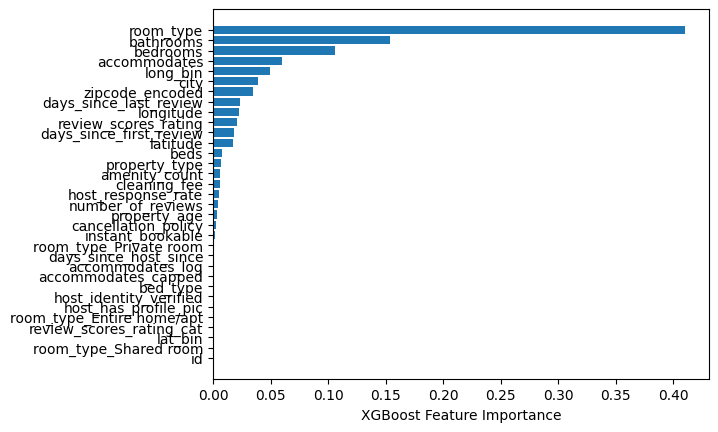

In [78]:
import matplotlib.pyplot as plt

feature_importances = xgb_reg.feature_importances_
sorted_idx = feature_importances.argsort()

plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
plt.show()


Hyperparameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    # You can add more parameters here
}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


Cross-Validation

In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = (scores * -1) ** 0.5
print(f"Average RMSE from CV: {rmse_scores.mean()}")


Average RMSE from CV: 0.38234371335547757


Model Interpretation

In [82]:
!pip install shap



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.3 MB/s eta 0:00:00


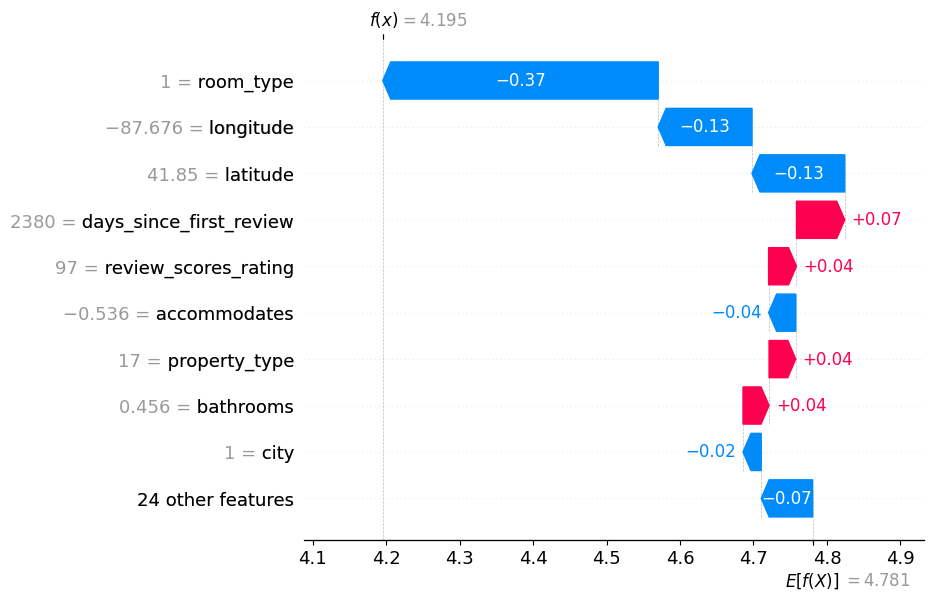

In [83]:
import shap

# Assuming 'best_model' is your trained XGBoost model and 'X_test' is your test dataset
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

# Visualize the first prediction's explanation (assuming you're interested in the first instance in your test set)
shap.plots.waterfall(shap_values[0])
